# Image Data Augmentation on Fashion-MNIST

### Load and check the data using the data.py file

In [31]:
import sys
sys.path.append("..")

from src.data import load_data

(x_train, y_train), (x_val, y_val), (x_test, y_test) = load_data()

print("Train:", x_train.shape)
print("Val:", x_val.shape)
print("Test:", x_test.shape)
print("Range:", x_train.min(), x_train.max())

Train: (54000, 28, 28, 1)
Val: (6000, 28, 28, 1)
Test: (10000, 28, 28, 1)
Range: 0.0 1.0


#### Visual Sanity Check

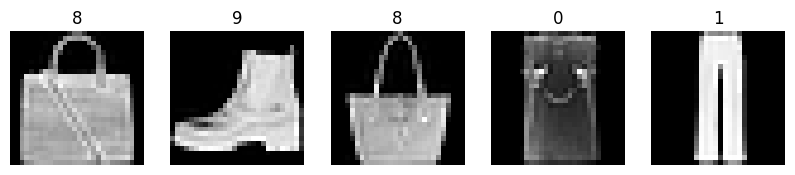

In [32]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(10, 2))

for i, ax in enumerate(axes):
    ax.imshow(x_train[i].squeeze(), cmap="gray")
    ax.set_title(str(y_train[i]))
    ax.axis("off")

plt.show()


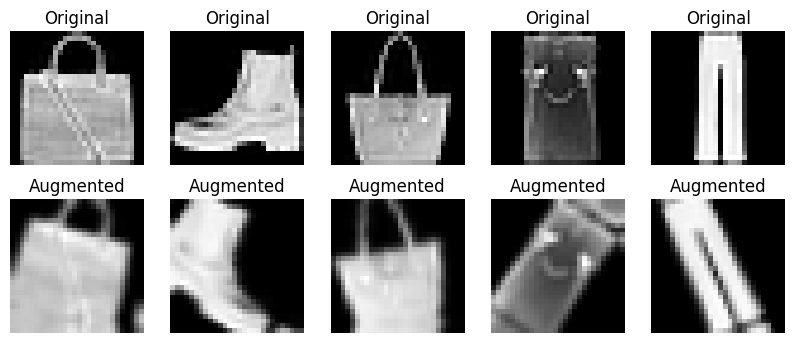

In [33]:
from src.augment import build_augmentation
import matplotlib.pyplot as plt

augmentation = build_augmentation()

sample_images = x_train[:5]

augmented_images = augmentation(sample_images, training=True)

fig, axes = plt.subplots(2, 5, figsize=(10, 4))

for i in range(5):
    axes[0, i].imshow(sample_images[i].squeeze(), cmap="gray")
    axes[0, i].set_title("Original")
    axes[0, i].axis("off")

    axes[1, i].imshow(augmented_images[i].numpy().squeeze(), cmap="gray")
    axes[1, i].set_title("Augmented")
    axes[1, i].axis("off")

plt.show()